In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# magic command for matplotlib to enable printing directly in the jupyter notebook
%matplotlib inline 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
#from sklearn.metrics import plot_confusion_matrix
#from pandas.api.types import is_string_dtype, is_numeric_dtype
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.utils import resample,shuffle


In [2]:
# set the maximum number of columns to display
pd.options.display.max_columns = None

In [3]:
# PATHS

# get working directory
path_working = Path.cwd()

path_data_binary = str(path_working) + "\\" + "data" + "\\" + "binary" + "\\"

path_data_triple = str(path_working) + "\\" + "data" + "\\" + "triple" + "\\"

path_data_multiclass = str(path_working) + "\\" + "data" + "\\" + "multiclass" + "\\"


In [4]:
def create_dataframe (path):
    # Get the files from the path provided in the OP
    files = Path(path).glob('*.csv')  # .rglob to create iterator for subdirectories
    
    #Find all csv files in directory and concatenate them
    dfs = list()
    names = list()
    for file in files:
        data = pd.read_csv(file)
        # .stem is method for pathlib objects to get the filename without the extension
        # create another column in dataframe for filename
        data['file'] = file.stem
        names.append(file.stem)
        dfs.append(data)
    
    df = pd.concat(dfs, ignore_index=True)
    
    return df


In [5]:
df_raw_binary = create_dataframe(path_data_binary)

In [6]:
df_raw_binary

R1-PA1:VH     R1-PM1:V   R1-PA2:VH     R1-PM2:V   R1-PA3:VH  \
0      70.399324  127673.0908  -49.572308  127648.0176 -169.578319   
1      73.688102  130280.7109  -46.300719  130255.6377 -166.278082   
2      73.733939  130305.7842  -46.254883  130280.7109 -166.232245   
3      74.083443  130581.5902  -45.899649  130556.5169 -165.882741   
4      74.553268  131083.0556  -45.424094  131057.9823 -165.424375   
...          ...          ...         ...          ...         ...   
78372 -58.934439  130706.9565 -178.900342  130681.8832   61.094490   
78373 -59.020382  131057.9823 -178.992015  131032.9090   61.002816   
78374 -59.031842  131083.0556 -179.003474  131032.9090   60.997087   
78375 -59.077678  131108.1288 -179.049311  131057.9823   60.951250   
78376 -59.203729  131158.2754 -179.169632  131108.1288   60.825200   

          R1-PM3:V  R1-PA4:IH   R1-PM4:I   R1-PA5:IH   R1-PM5:I   R1-PA6:IH  \
0      127723.2374  65.689611  605.91099  -57.003571  626.78553 -173.589023   
1      130355.9307  71.831719  483.59351  -50.947407  500.98896 -167.487023   
2      130381.0040  71.808800  483.59351  -50.913030  500.98896 -167.441186   
3      130656.8100  72.152575  482.86107  -50.437475  499.15786 -167.286487   
4      131158.2754  72.118198  484.50906  -50.013486  497.69298 -167.464104   
...            ...        ...        ...         ...        ...         ...   
78372  130782.1763 -60.149109  444.59108  178.808669  449.90127   58.922980   
78373  131108.1288 -61.507019  451.73237  177.857559  454.66213   57.777064   
78374  131133.2021 -61.535667  451.91548  177.857559  454.66213   57.777064   
78375  131158.2754 -61.839335  453.38036  177.725778  455.02835   57.633825   
78376  131208.4219 -62.446670  455.39457  177.336167  456.12701   57.255672   

        R1-PM6:I  R1-PA7:VH     R1-PM7:V  R1-PA8:VH  R1-PM8:V  R1-PA9:VH  \
0      602.43190  70.422243  127673.0908        0.0       0.0        0.0   
1      481.39619  73.705291  130305.7842        0.0       0.0        0.0   
2      481.02997  73.751127  130330.8575        0.0       0.0        0.0   
3      481.39619  74.106361  130581.5902        0.0       0.0        0.0   
4      484.69217  74.570457  131108.1288        0.0       0.0        0.0   
...          ...        ...          ...        ...       ...        ...   
78372  448.25328 -58.911521  130732.0298        0.0       0.0        0.0   
78373  453.56347 -59.003194  131057.9823        0.0       0.0        0.0   
78374  453.56347 -59.014653  131083.0556        0.0       0.0        0.0   
78375  454.11280 -59.060490  131108.1288        0.0       0.0        0.0   
78376  455.21146 -59.186540  131158.2754        0.0       0.0        0.0   

       R1-PM9:V  R1-PA10:IH  R1-PM10:I  R1-PA11:IH  R1-PM11:I  R1-PA12:IH  \
0           0.0   65.007791  611.58740  118.567886   13.18392 -100.869220   
1           0.0   71.109792  488.35437  125.792884   10.62038  -95.884487   
2           0.0   71.132710  488.35437  125.007932   10.62038  -94.520847   
3           0.0   71.459296  487.62193  127.597701    9.70483  -96.657980   
4           0.0   71.539510  488.90370  127.666456    7.50751  -99.923839   
...         ...         ...        ...         ...        ...         ...   
78372       0.0  -60.813740  447.52084   51.033351    3.29598    0.000000   
78373       0.0  -61.959656  453.38036    0.000000    0.00000    0.000000   
78374       0.0  -61.971115  453.38036    0.000000    0.00000    0.000000   
78375       0.0  -62.165921  454.11280    0.000000    0.00000    0.000000   
78376       0.0  -62.618557  455.57768    0.000000    0.00000    0.000000   

       R1-PM12:I    R1:F  R1:DF   R1-PA:Z  R1-PA:ZH  R1:S  R2-PA1:VH  \
0       13.91636  59.999   0.01  6.391383  0.076290     0  60.658268   
1       11.35282  60.005   0.00  8.185463  0.024924     0  66.069035   
2       11.35282  60.005   0.00  8.190006  0.027904     0  66.112980   
3       10.43727  60.003   0.00  8.171532  0.025617     0  66.508489   
4        8.60617  6

In [7]:
#drop last column taht shows csv filename source:
del df_raw_binary[df_raw_binary.columns[-1]]

df_raw_binary

R1-PA1:VH     R1-PM1:V   R1-PA2:VH     R1-PM2:V   R1-PA3:VH  \
0      70.399324  127673.0908  -49.572308  127648.0176 -169.578319   
1      73.688102  130280.7109  -46.300719  130255.6377 -166.278082   
2      73.733939  130305.7842  -46.254883  130280.7109 -166.232245   
3      74.083443  130581.5902  -45.899649  130556.5169 -165.882741   
4      74.553268  131083.0556  -45.424094  131057.9823 -165.424375   
...          ...          ...         ...          ...         ...   
78372 -58.934439  130706.9565 -178.900342  130681.8832   61.094490   
78373 -59.020382  131057.9823 -178.992015  131032.9090   61.002816   
78374 -59.031842  131083.0556 -179.003474  131032.9090   60.997087   
78375 -59.077678  131108.1288 -179.049311  131057.9823   60.951250   
78376 -59.203729  131158.2754 -179.169632  131108.1288   60.825200   

          R1-PM3:V  R1-PA4:IH   R1-PM4:I   R1-PA5:IH   R1-PM5:I   R1-PA6:IH  \
0      127723.2374  65.689611  605.91099  -57.003571  626.78553 -173.589023   
1      130355.9307  71.831719  483.59351  -50.947407  500.98896 -167.487023   
2      130381.0040  71.808800  483.59351  -50.913030  500.98896 -167.441186   
3      130656.8100  72.152575  482.86107  -50.437475  499.15786 -167.286487   
4      131158.2754  72.118198  484.50906  -50.013486  497.69298 -167.464104   
...            ...        ...        ...         ...        ...         ...   
78372  130782.1763 -60.149109  444.59108  178.808669  449.90127   58.922980   
78373  131108.1288 -61.507019  451.73237  177.857559  454.66213   57.777064   
78374  131133.2021 -61.535667  451.91548  177.857559  454.66213   57.777064   
78375  131158.2754 -61.839335  453.38036  177.725778  455.02835   57.633825   
78376  131208.4219 -62.446670  455.39457  177.336167  456.12701   57.255672   

        R1-PM6:I  R1-PA7:VH     R1-PM7:V  R1-PA8:VH  R1-PM8:V  R1-PA9:VH  \
0      602.43190  70.422243  127673.0908        0.0       0.0        0.0   
1      481.39619  73.705291  130305.7842        0.0       0.0        0.0   
2      481.02997  73.751127  130330.8575        0.0       0.0        0.0   
3      481.39619  74.106361  130581.5902        0.0       0.0        0.0   
4      484.69217  74.570457  131108.1288        0.0       0.0        0.0   
...          ...        ...          ...        ...       ...        ...   
78372  448.25328 -58.911521  130732.0298        0.0       0.0        0.0   
78373  453.56347 -59.003194  131057.9823        0.0       0.0        0.0   
78374  453.56347 -59.014653  131083.0556        0.0       0.0        0.0   
78375  454.11280 -59.060490  131108.1288        0.0       0.0        0.0   
78376  455.21146 -59.186540  131158.2754        0.0       0.0        0.0   

       R1-PM9:V  R1-PA10:IH  R1-PM10:I  R1-PA11:IH  R1-PM11:I  R1-PA12:IH  \
0           0.0   65.007791  611.58740  118.567886   13.18392 -100.869220   
1           0.0   71.109792  488.35437  125.792884   10.62038  -95.884487   
2           0.0   71.132710  488.35437  125.007932   10.62038  -94.520847   
3           0.0   71.459296  487.62193  127.597701    9.70483  -96.657980   
4           0.0   71.539510  488.90370  127.666456    7.50751  -99.923839   
...         ...         ...        ...         ...        ...         ...   
78372       0.0  -60.813740  447.52084   51.033351    3.29598    0.000000   
78373       0.0  -61.959656  453.38036    0.000000    0.00000    0.000000   
78374       0.0  -61.971115  453.38036    0.000000    0.00000    0.000000   
78375       0.0  -62.165921  454.11280    0.000000    0.00000    0.000000   
78376       0.0  -62.618557  455.57768    0.000000    0.00000    0.000000   

       R1-PM12:I    R1:F  R1:DF   R1-PA:Z  R1-PA:ZH  R1:S  R2-PA1:VH  \
0       13.91636  59.999   0.01  6.391383  0.076290     0  60.658268   
1       11.35282  60.005   0.00  8.185463  0.024924     0  66.069035   
2       11.35282  60.005   0.00  8.190006  0.027904     0  66.112980   
3       10.43727  60.003   0.00  8.171532  0.025617     0  66.508489   
4        8.60617  6

In [8]:
print(df_raw_binary.shape)

df_raw_binary['marker'].value_counts()

(78377, 129)


Attack     55663
Natural    22714
Name: marker, dtype: int64

### ---> unbalanced classes

In [9]:
df_raw_binary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78377 entries, 0 to 78376
Columns: 129 entries, R1-PA1:VH to marker
dtypes: float64(113), int64(15), object(1)
memory usage: 77.1+ MB


In [10]:
df_raw_binary.describe()

R1-PA1:VH       R1-PM1:V     R1-PA2:VH       R1-PM2:V     R1-PA3:VH  \
count  78377.000000   78377.000000  78377.000000   78377.000000  78377.000000   
mean     -15.802424  130764.039577      2.175196  131035.528095      6.834315   
std      100.876750    8546.118477    111.743169    5393.135370     97.065063   
min     -179.988962       0.000000   -179.994691       0.000000   -179.994691   
25%     -100.416583  131057.982300   -102.129727  130732.029800    -69.459673   
50%      -28.865614  131684.814000      8.118812  131358.861500     13.401483   
75%       68.096034  132186.279400    104.897113  131885.400200     85.324875   
max      179.994691  151592.990400    179.994691  151567.917200    179.988962   

            R1-PM3:V     R1-PA4:IH      R1-PM4:I     R1-PA5:IH      R1-PM5:I  \
count   78377.000000  78377.000000  78377.000000  78377.000000  78377.000000   
mean   131395.717581    -14.334996    393.949321      3.538540    387.438133   
std      5443.752388     99.601107    190.966011    109.504977    151.277183   
min         0.000000   -179.994691      0.000000   -179.994691      0.000000   
25%    131133.202100    -98.159129    305.793700    -94.790138    311.836330   
50%    131760.033900    -23.514188    378.671480      1.885031    383.249230   
75%    132261.499300     66.274028    456.676340    102.674037    460.338540   
max    151693.283500    179.994691   1779.462980    179.994691   1265.656320   

          R1-PA6:IH      R1-PM6:I     R1-PA7:VH       R1-PM7:V     R1-PA8:VH  \
count  78377.000000  78377.000000  78377.000000   78377.000000  78377.000000   
mean       6.129781    381.912845    -15.798835  131056.980030      0.207857   
std       95.294904    153.326452    100.877118    6152.379663     13.075863   
min     -179.994691      0.000000   -179.994691       0.000000   -179.501948   
25%      -66.279758    303.962600   -100.399394  130982.762500      0.000000   
50%        6.881223    376.474160    -28.842695  131609.594200      0.000000   
75%       82.053286    454.295910     68.096034  132085.986400      0.000000   
max      179.994691   1263.459000    179.988962  151618.063700    179.977503   

           R1-PM8:V     R1-PA9:VH      R1-PM9:V    R1-PA10:IH     R1-PM10:I  \
count  78377.000000  78377.000000  78377.000000  78377.000000  78377.000000   
mean     297.083556      0.227606     87.397031    -14.504282    386.557188   
std     2687.617199     12.488596    897.541412     99.605025    154.484403   
min        0.000000   -179.903018      0.000000   -179.994691      0.000000   
25%        0.000000      0.000000      0.000000    -98.227884    307.807910   
50%        0.000000      0.000000      0.000000    -23.749101    380.319470   
75%        0.000000      0.000000      0.000000     66.027656    457.775000   
max    46987.307980    179.467570  17501.142460    179.988962   1263.459000   

         R1-PA11:IH     R1-PM11:I    R1-PA12:IH     R1-PM12:I          R1:F  \
count  78377.000000  78377.000000  78377.000000  78377.000000  78377.000000   
mean      -1.734936      9.979982      6.123374      9.494176     59.992801   
std       68.383257     47.241783     73.059209     47.875569      0.610045   
min     -179.994691      0.000000   -179.988962      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000     59.999000   
50%        0.000000      0.000000      0.000000      0.000000     60.000000   
75%        0.000000      7.141290     14.667720      7.141290     60.000000   
max      179.988962    611.404290    179.988962    723.467610     66.035000   

              R1:DF       R1-PA:Z      R1-PA:ZH           R1:S     R2-PA1:VH  \
count  78377.000000  7.837700e+04  78377.000000   78377.000000  78377.000000   
mean       0.000529           inf      0.018428     788.868750    -15.216491   
std        0.087799           NaN      0.242813   14048.448459    101.837622   
min       -4.010000  1.852102e-01     -3.140569       0.000000   -179.994691   
25%        0.0

In [11]:
# Look at datatypes of coloumns.
def show_dtypes(df):
    for index in range(len(df.dtypes)):
        print(f'{df.columns[index]} -> {df.dtypes[index]}' )
        
show_dtypes(df_raw_binary)

R1-PA1:VH -> float64
R1-PM1:V -> float64
R1-PA2:VH -> float64
R1-PM2:V -> float64
R1-PA3:VH -> float64
R1-PM3:V -> float64
R1-PA4:IH -> float64
R1-PM4:I -> float64
R1-PA5:IH -> float64
R1-PM5:I -> float64
R1-PA6:IH -> float64
R1-PM6:I -> float64
R1-PA7:VH -> float64
R1-PM7:V -> float64
R1-PA8:VH -> float64
R1-PM8:V -> float64
R1-PA9:VH -> float64
R1-PM9:V -> float64
R1-PA10:IH -> float64
R1-PM10:I -> float64
R1-PA11:IH -> float64
R1-PM11:I -> float64
R1-PA12:IH -> float64
R1-PM12:I -> float64
R1:F -> float64
R1:DF -> float64
R1-PA:Z -> float64
R1-PA:ZH -> float64
R1:S -> int64
R2-PA1:VH -> float64
R2-PM1:V -> float64
R2-PA2:VH -> float64
R2-PM2:V -> float64
R2-PA3:VH -> float64
R2-PM3:V -> float64
R2-PA4:IH -> float64
R2-PM4:I -> float64
R2-PA5:IH -> float64
R2-PM5:I -> float64
R2-PA6:IH -> float64
R2-PM6:I -> float64
R2-PA7:VH -> float64
R2-PM7:V -> float64
R2-PA8:VH -> float64
R2-PM8:V -> float64
R2-PA9:VH -> float64
R2-PM9:V -> float64
R2-PA10:IH -> float64
R2-PM10:I -> float64
R2-P

In [12]:
# .copy() is very important otherwise its just a pointer
df = df_raw_binary.copy()

In [13]:
def marker_to_numeric_binary(x):
        if x=='Attack': return 0
        if x=='Natural': return 1
     
        
LABEL_MAP = {0 : "Attack", 1: "Natural"}

LABELNAMES = [LABEL_MAP[key] for key in LABEL_MAP]

df['marker'] = df['marker'].apply(marker_to_numeric_binary)
df

R1-PA1:VH     R1-PM1:V   R1-PA2:VH     R1-PM2:V   R1-PA3:VH  \
0      70.399324  127673.0908  -49.572308  127648.0176 -169.578319   
1      73.688102  130280.7109  -46.300719  130255.6377 -166.278082   
2      73.733939  130305.7842  -46.254883  130280.7109 -166.232245   
3      74.083443  130581.5902  -45.899649  130556.5169 -165.882741   
4      74.553268  131083.0556  -45.424094  131057.9823 -165.424375   
...          ...          ...         ...          ...         ...   
78372 -58.934439  130706.9565 -178.900342  130681.8832   61.094490   
78373 -59.020382  131057.9823 -178.992015  131032.9090   61.002816   
78374 -59.031842  131083.0556 -179.003474  131032.9090   60.997087   
78375 -59.077678  131108.1288 -179.049311  131057.9823   60.951250   
78376 -59.203729  131158.2754 -179.169632  131108.1288   60.825200   

          R1-PM3:V  R1-PA4:IH   R1-PM4:I   R1-PA5:IH   R1-PM5:I   R1-PA6:IH  \
0      127723.2374  65.689611  605.91099  -57.003571  626.78553 -173.589023   
1      130355.9307  71.831719  483.59351  -50.947407  500.98896 -167.487023   
2      130381.0040  71.808800  483.59351  -50.913030  500.98896 -167.441186   
3      130656.8100  72.152575  482.86107  -50.437475  499.15786 -167.286487   
4      131158.2754  72.118198  484.50906  -50.013486  497.69298 -167.464104   
...            ...        ...        ...         ...        ...         ...   
78372  130782.1763 -60.149109  444.59108  178.808669  449.90127   58.922980   
78373  131108.1288 -61.507019  451.73237  177.857559  454.66213   57.777064   
78374  131133.2021 -61.535667  451.91548  177.857559  454.66213   57.777064   
78375  131158.2754 -61.839335  453.38036  177.725778  455.02835   57.633825   
78376  131208.4219 -62.446670  455.39457  177.336167  456.12701   57.255672   

        R1-PM6:I  R1-PA7:VH     R1-PM7:V  R1-PA8:VH  R1-PM8:V  R1-PA9:VH  \
0      602.43190  70.422243  127673.0908        0.0       0.0        0.0   
1      481.39619  73.705291  130305.7842        0.0       0.0        0.0   
2      481.02997  73.751127  130330.8575        0.0       0.0        0.0   
3      481.39619  74.106361  130581.5902        0.0       0.0        0.0   
4      484.69217  74.570457  131108.1288        0.0       0.0        0.0   
...          ...        ...          ...        ...       ...        ...   
78372  448.25328 -58.911521  130732.0298        0.0       0.0        0.0   
78373  453.56347 -59.003194  131057.9823        0.0       0.0        0.0   
78374  453.56347 -59.014653  131083.0556        0.0       0.0        0.0   
78375  454.11280 -59.060490  131108.1288        0.0       0.0        0.0   
78376  455.21146 -59.186540  131158.2754        0.0       0.0        0.0   

       R1-PM9:V  R1-PA10:IH  R1-PM10:I  R1-PA11:IH  R1-PM11:I  R1-PA12:IH  \
0           0.0   65.007791  611.58740  118.567886   13.18392 -100.869220   
1           0.0   71.109792  488.35437  125.792884   10.62038  -95.884487   
2           0.0   71.132710  488.35437  125.007932   10.62038  -94.520847   
3           0.0   71.459296  487.62193  127.597701    9.70483  -96.657980   
4           0.0   71.539510  488.90370  127.666456    7.50751  -99.923839   
...         ...         ...        ...         ...        ...         ...   
78372       0.0  -60.813740  447.52084   51.033351    3.29598    0.000000   
78373       0.0  -61.959656  453.38036    0.000000    0.00000    0.000000   
78374       0.0  -61.971115  453.38036    0.000000    0.00000    0.000000   
78375       0.0  -62.165921  454.11280    0.000000    0.00000    0.000000   
78376       0.0  -62.618557  455.57768    0.000000    0.00000    0.000000   

       R1-PM12:I    R1:F  R1:DF   R1-PA:Z  R1-PA:ZH  R1:S  R2-PA1:VH  \
0       13.91636  59.999   0.01  6.391383  0.076290     0  60.658268   
1       11.35282  60.005   0.00  8.185463  0.024924     0  66.069035   
2       11.35282  60.005   0.00  8.190006  0.027904     0  66.112980   
3       10.43727  60.003   0.00  8.171532  0.025617     0  66.508489   
4        8.60617  6

In [14]:
# Check for infinite float entries
# "np.finfo(np.float64).max" returns the maximum finite value that can be represented by a 64-bit floating point number
# "df.values >= np.finfo(np.float64).max" returns a bollean array where "np.finfo(np.float64).max" is checked
# "np.where(df.values >= np.finfo(np.float64).max)" returns a array of indices where "df.values >= np.finfo(np.float64).max" is true

np.where(df.values >= np.finfo(np.float64).max)

(array([  738,   739,   753, ..., 78352, 78353, 78353], dtype=int64),
 array([26, 26, 26, ..., 55, 26, 55], dtype=int64))

### ----> we have infinite float entries

In [15]:
# Check for NaN values
np.isnan(df.values.any())

False

### ----> we have no NaN values in the dataframe

In [16]:
# Replace infinite updated data with nan

# "[np.inf, -np.inf]" specifies the values to be replaced
# "np.nan" specifies the value to replace the infinite values with.
# "inplace=True" modifies the Dataframe in place, so that the original df is updated the new values
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN
df.dropna(inplace=True)

print(df.shape)

df['marker'].value_counts()

(72073, 129)


0    51445
1    20628
Name: marker, dtype: int64

### ----> Due to cleaning up NaNs and infinites we lost about 6000 datapoints, which is not very harmful due to the fact that there are still 72000 rows

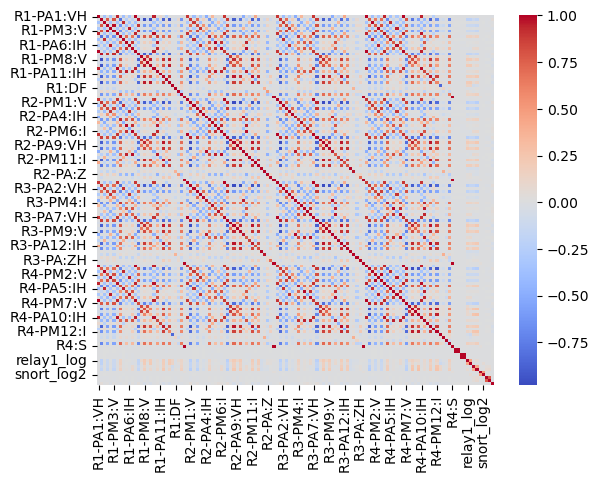

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, cmap="coolwarm")

# Show the plot
plt.show()

In [37]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

#This only copies a Series Object, no pandas Dataframe!
df_marker = df["marker"].copy()
#Converting to Pandas Dataframe
df_marker = pd.DataFrame(df_marker)

#Delete Marker column because "marker" should not be normalized
df_nomarker = df.copy()
del df_nomarker[df_nomarker.columns[-1]]

#Initialize SCaler
scaler = StandardScaler()
#Scale data
data_normalized = scaler.fit_transform(df_nomarker)
#insert normalized data in former pandas frame
df_normalized_nomark = pd.DataFrame(data_normalized, columns=df_nomarker.columns)

#concat "marker" column with normalized rest dataframe, index of marker frame is overwritten
df_normalized = pd.concat([df_normalized_nomark, df_marker.set_index(df_normalized_nomark.index)], axis=1)

#print(df_normalized_nomark)

#print(isinstance(df, pd.DataFrame))

#print(isinstance(df_marker, pd.DataFrame))

#print(df_normalized)

In [38]:
df_normalized

R1-PA1:VH  R1-PM1:V  R1-PA2:VH  R1-PM2:V  R1-PA3:VH  R1-PM3:V  \
0       0.852157 -0.518240  -0.462850 -1.773135  -1.812706 -1.832238   
1       0.884735 -0.126254  -0.433586 -0.513119  -1.778744 -0.614314   
2       0.885189 -0.122485  -0.433176 -0.501004  -1.778273 -0.602715   
3       0.888651 -0.081025  -0.429999 -0.367733  -1.774676 -0.475123   
4       0.893305 -0.005643  -0.425745 -0.125422  -1.769959 -0.243137   
...          ...       ...        ...       ...        ...       ...   
72068  -0.428984 -0.062179  -1.619687 -0.307155   0.561076 -0.417126   
72069  -0.429835 -0.009412  -1.620507 -0.137538   0.560133 -0.266336   
72070  -0.429949 -0.005643  -1.620609 -0.137538   0.560074 -0.254736   
72071  -0.430403 -0.001874  -1.621019 -0.125422   0.559602 -0.243137   
72072  -0.431651  0.005665  -1.622096 -0.101191   0.558305 -0.219938   

       R1-PA4:IH  R1-PM4:I  R1-PA5:IH  R1-PM5:I  R1-PA6:IH  R1-PM6:I  \
0       0.796566  1.533650  -0.540853  2.788930  -1.855011  2.498183   
1       0.857249  0.660454  -0.486641  1.328263  -1.792170  1.135963   
2       0.857023  0.660454  -0.486333  1.328263  -1.791698  1.131842   
3       0.860419  0.655225  -0.482076  1.307002  -1.790105  1.135963   
4       0.860080  0.666990  -0.478281  1.289993  -1.791934  1.173058   
...          ...       ...        ...       ...        ...       ...   
72068  -0.446705  0.382025   1.570038  0.735067   0.539471  0.762950   
72069  -0.460121  0.433005   1.561525  0.790347   0.527670  0.822715   
72070  -0.460404  0.434312   1.561525  0.790347   0.527670  0.822715   
72071  -0.463404  0.444769   1.560345  0.794599   0.526195  0.828897   
72072  -0.469405  0.459148   1.556857  0.807356   0.522301  0.841262   

       R1-PA7:VH  R1-PM7:V  R1-PA8:VH  R1-PM8:V  R1-PA9:VH  R1-PM9:V  \
0       0.852355 -1.056606   -0.01642 -0.101804  -0.018744 -0.088095   
1       0.884876 -0.303573   -0.01642 -0.101804  -0.018744 -0.088095   
2       0.885330 -0.296402   -0.01642 -0.101804  -0.018744 -0.088095   
3       0.888849 -0.224684   -0.01642 -0.101804  -0.018744 -0.088095   
4       0.893446 -0.074078   -0.01642 -0.101804  -0.018744 -0.088095   
...          ...       ...        ...       ...        ...       ...   
72068  -0.428795 -0.181654   -0.01642 -0.101804  -0.018744 -0.088095   
72069  -0.429703 -0.088421   -0.01642 -0.101804  -0.018744 -0.088095   
72070  -0.429817 -0.081249   -0.01642 -0.101804  -0.018744 -0.088095   
72071  -0.430271 -0.074078   -0.01642 -0.101804  -0.018744 -0.088095   
72072  -0.431519 -0.059734   -0.01642 -0.101804  -0.018744 -0.088095   

       R1-PA10:IH  R1-PM10:I  R1-PA11:IH  R1-PM11:I  R1-PA12:IH  R1-PM12:I  \
0        0.791746   2.469787    1.726587   0.086377   -1.436420   0.106445   
1        0.852030   1.126987    1.830445   0.027296   -1.369623   0.049773   
2        0.852256   1.126987    1.819161   0.027296   -1.351349   0.049773   
3        0.855483   1.119006    1.856388   0.006195   -1.379988   0.029533   
4        0.856275   1.132972    1.857377  -0.044446   -1.423752  -0.010946   
...           ...        ...         ...        ...         ...        ...   
72068   -0.451286   0.682047    0.755796  -0.141508   -0.084726  -0.201200   
72069   -0.462607   0.745895    0.022205  -0.217469   -0.084726  -0.201200   
72070   -0.462720   0.745895    0.022205  -0.217469   -0.084726  -0.201200   
72071   -0.464645   0.753876    0.022205  -0.217469   -0.084726  -0.201200   
72072   -0.469117   0.769838    0.022205  -0.217469   -0.084726  -0.201200   

           R1:F     R1:DF   R1-PA:Z  R1-PA:ZH      R1:S  R4-PM1:V  R4-PA2:VH  \
0      0.016544  0.144394 -0.388887  0.301175 -0.051725 -0.583912  -0.462461   
1      0.107689 -0.002412 -0.234596  0.045896 -0.051725 -0.174040  -0.433045   
2      0.107689 -0.002412 -0.234205  0.060704 -0.051725 -0.170099  -0.432583   
3      0.077307 -0.002412 -0.235794  0.049341 -0.051725 -0.126747  -0.429457   
4      0.046925 -0.002412 -0.243709  0.085738 -0.051725 -0.047925  -0.42520

In [39]:
from sklearn.decomposition import PCA

# Create a PCA object with the desired number of components
pca = PCA(n_components=10)

# Fit the PCA model to the data
pca.fit(df_normalized_nomark)

# Transform the data onto the new feature space
df_normalized_nomark_transformed = pca.transform(df_normalized_nomark)

# Create a new DataFrame with the transformed features and column names
pca_columns = ['PC{}'.format(i+1) for i in range(10)]
pca_df = pd.DataFrame(df_normalized_nomark_transformed, columns=pca_columns)

# Concatenate the label column to the PCA DataFrame
#pca_df = pd.concat([pca_df, df_marker], axis=1)

#concat "marker" column with normalized rest dataframe, index of marker frame is overwritten
pca_df = pd.concat([pca_df, df_marker.set_index(df_normalized_nomark.index)], axis=1)

# Inspect the new DataFrame
#print(pca_df.head())


In [40]:
pca_df

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0      5.181878 -3.830231  0.587592 -5.720520 -0.510245 -0.075563  0.113679   
1      2.009788 -3.817473  1.177350 -2.804399 -0.371424 -0.138367  0.119640   
2      2.001679 -3.816753  1.176704 -2.806173 -0.371946 -0.138131  0.120259   
3      1.816047 -3.830174  1.169143 -2.813033 -0.393274 -0.149380  0.133284   
4      1.510749 -3.846100  1.153202 -2.887640 -0.442310 -0.169404  0.154288   
...         ...       ...       ...       ...       ...       ...       ...   
72068  1.044763  1.231177 -1.472064 -1.688166 -0.042949 -0.033023  0.023697   
72069  0.955438  1.247499 -1.347400 -1.799306 -0.160685  0.017372 -0.007110   
72070  0.951233  1.247613 -1.347104 -1.797617 -0.160737  0.013727 -0.005535   
72071  0.959631  1.249851 -1.348155 -1.803897 -0.161006  0.013305 -0.004897   
72072  0.980922  1.254281 -1.352673 -1.827374 -0.162867  0.014997 -0.003478   

            PC8       PC9      PC10  marker  
0      0.044207  0.380301 -2.756544       1  
1      0.081565  0.426837 -2.799833       1  
2      0.082010  0.426907 -2.799572       1  
3      0.091493  0.441564 -2.850844       1  
4      0.109704  0.463821 -2.912822       1  
...         ...       ...       ...     ...  
72068 -0.011012  0.069642 -0.529552       1  
72069  0.010718  0.016515 -0.170986       1  
72070  0.011061  0.016765 -0.175427       1  
72071  0.011872  0.017905 -0.179110       1  
72072  0.013862  0.020299 -0.187715       1  

[72073 rows x 11 columns]

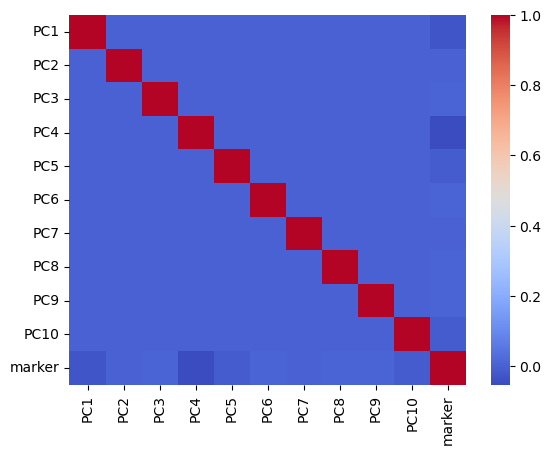

In [41]:
# Calculate the correlation matrix
corr_matrix = pca_df.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, cmap="coolwarm")

# Show the plot
plt.show()

In [42]:
# .copy() is very important otherwise its just a pointer
df = pca_df.copy()

In [43]:
y = df['marker']

X = df.drop(['marker'],axis =1)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((57658, 10), (57658,), (14415, 10), (14415,))

In [45]:
params = {'bootstrap': False, 'max_depth': None, 'max_features': 3, 'min_samples_split': 2, 'n_estimators': 571}

In [46]:
model_rf_best = RandomForestClassifier(**params, random_state=42)
%time model_rf_best.fit(X_train, y_train) #jupyter magic command %time to measure the computing time for a single line of code

Wall time: 2min 21s


RandomForestClassifier(bootstrap=False, max_features=3, n_estimators=571,
                       random_state=42)

In [47]:
def evaluate_model(model, X_test, y_test, labelmap, binarylabels = False):
    """
    Evaluate a multiclass classification model using various metrics.
    
    Args:
        model (sklearn estimator): The model to evaluate.
        X_test (pandas dataframe): The test features.
        y_test (pandas series): The true labels
        labelmap (dict): The encoding of the names of the labels that are passed to report and matrix
        binarylabels (bool): If True model was built out of a binary classification problem
        
    Returns:
        sklearn confusionmatrix , sklearn report, metrics
    """
    
    #THIS IS EXTREMELY IMPORTANT:
    # scikit learn sorts labels in ascending order, thus 0's are first column/row and 1's are the second one
    # this means also that 0's are positive class in the report as well as in the confusion matrix!
    # To be on the safe side, here the labels are given by labelmap, where "Attack" has the key 0! So "Attack" is positive class!
    
    labelnames = [labelmap[key] for key in labelmap]

    
    # Predict the test labels using the trained model
    y_pred = model.predict(X_test)
    
    # map encoded labels to original labels
    y_true = [labelmap[i] for i in y_test]
    y_pred = [labelmap[i] for i in y_pred]
    
    # Compute the confusion matrix and print it
    confusionmatrix = confusion_matrix(y_true, y_pred, labels=labelnames)
    print("Confusion matrix:")
    print(confusionmatrix)
    
    # Compute the classification report and print it
    report = classification_report(y_true, y_pred, target_names=labelnames)
    print("Classification report:")
    print(report)
    
    if binarylabels == True:
        # Calculate metrics out of confusion matrix to compare
        
        tp, fn, fp, tn = confusionmatrix.ravel() # here also important first row, first columns are 0 so positive class so tp

        #  0   1
        # 0 [tp, fn]
        # 1 [fp, tn]

        precision = tp / (tp+fp)
        recall = tp / (tp+fn)
        specificity = tn / (tn+fp)

        metrics = [precision, recall, specificity]
        
    else:
        metrics = None
    
    return confusionmatrix, report, metrics

In [48]:
cm, rp, mets = evaluate_model(model_rf_best, X_test, y_test, LABEL_MAP, True)

Confusion matrix:
[[9942  347]
 [1081 3045]]
Classification report:
              precision    recall  f1-score   support

      Attack       0.90      0.97      0.93     10289
     Natural       0.90      0.74      0.81      4126

    accuracy                           0.90     14415
   macro avg       0.90      0.85      0.87     14415
weighted avg       0.90      0.90      0.90     14415



In [49]:
print(mets)

[0.901932323323959, 0.9662746622606667, 0.7380029083858458]


In [26]:
df_R1 = df.iloc[:, 0:29]

df_R2 = df.iloc[:, 30:58]

df_R3 = df.iloc[:, 59:87]

df_R4 = df.iloc[:, 88:116]

df_snort_marker = df.iloc[:, 116:]

In [27]:
df_snort_marker

control_panel_log1  control_panel_log2  control_panel_log3  \
0                       0                   0                   0   
1                       0                   0                   0   
2                       0                   0                   0   
3                       0                   0                   0   
4                       0                   0                   0   
...                   ...                 ...                 ...   
78372                   0                   0                   0   
78373                   0                   0                   0   
78374                   0                   0                   0   
78375                   0                   0                   0   
78376                   0                   0                   0   

       control_panel_log4  relay1_log  relay2_log  relay3_log  relay4_log  \
0                       0           0           0           0           0   
1                       0           0           0           0           0   
2                       0           0           0           0           0   
3                       0           0           0           0           0   
4                       0           0           0           0           0   
...                   ...         ...         ...         ...         ...   
78372                   0           0           0           0           0   
78373                   0           0           0           0           0   
78374                   0           0           0           0           0   
78375                   0           0           0           0           0   
78376                   0           0           0           0           0   

       snort_log1  snort_log2  snort_log3  snort_log4  marker  
0               0           0           0           0       1  
1               0           0           0           0       1  
2               0           0           0           0       1  
3               0           0           0           0       1  
4               0           0           0           0       1  
...           ...         ...         ...         ...     ...  
78372           0           0           0           0       1  
78373           0           0           0           0       1  
78374           0           0           0           0       1  
78375           0           0           0           0       1  
78376           0           0           0           0       1  

[72073 rows x 13 columns]

In [28]:
df_R1_R4 = pd.concat([df_R1, df_R4, df_snort_marker], axis=1)

df_R1_R2_R4 = pd.concat([df_R1, df_R2, df_R4, df_snort_marker], axis=1)

df_R1_R3_R4 = pd.concat([df_R1, df_R3, df_R4, df_snort_marker], axis=1)

In [ ]:
df_R1_R3_R4

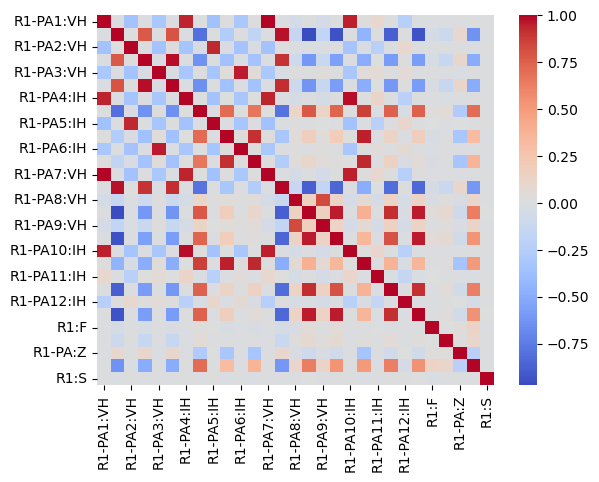

In [24]:
# Calculate the correlation matrix
corr_matrix = df_R1.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, cmap="coolwarm")

# Show the plot
plt.show()

In [ ]:
# Calculate the correlation matrix
corr_matrix = df_R2.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, cmap="coolwarm")

# Show the plot
plt.show()

In [ ]:
# Calculate the correlation matrix
corr_matrix = df_R3.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, cmap="coolwarm")

# Show the plot
plt.show()

In [ ]:
# Calculate the correlation matrix
corr_matrix = df_R4.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, cmap="coolwarm")

# Show the plot
plt.show()

In [ ]:
# set the maximum number of columns to display
pd.options.display.max_columns = None

In [ ]:
df_R1

In [ ]:
df_R1.describe()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a box plot of a single column
column_name = 'R1-PM1:V'
df[[column_name]].boxplot()

# Set the title and axis labels
plt.title('Box plot of ' + column_name)
plt.ylabel(column_name)

# Show the plot
plt.show()

In [ ]:
# Create a histogram
df[column_name].hist()

# Set the title and axis labels
plt.title('Histogram of ' + column_name)
plt.xlabel(column_name)
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [29]:
# .copy() is very important otherwise its just a pointer
df = df_R1_R4.copy()

In [30]:
y = df['marker']

X = df.drop(['marker'],axis =1)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((57658, 69), (57658,), (14415, 69), (14415,))

In [32]:
params = {'bootstrap': False, 'max_depth': None, 'max_features': 3, 'min_samples_split': 2, 'n_estimators': 571}

In [33]:
model_rf_best = RandomForestClassifier(**params, random_state=42)
%time model_rf_best.fit(X_train, y_train) #jupyter magic command %time to measure the computing time for a single line of code


Wall time: 1min 30s


RandomForestClassifier(bootstrap=False, max_features=3, n_estimators=571,
                       random_state=42)

In [34]:
def evaluate_model(model, X_test, y_test, labelmap, binarylabels = False):
    """
    Evaluate a multiclass classification model using various metrics.
    
    Args:
        model (sklearn estimator): The model to evaluate.
        X_test (pandas dataframe): The test features.
        y_test (pandas series): The true labels
        labelmap (dict): The encoding of the names of the labels that are passed to report and matrix
        binarylabels (bool): If True model was built out of a binary classification problem
        
    Returns:
        sklearn confusionmatrix , sklearn report, metrics
    """
    
    #THIS IS EXTREMELY IMPORTANT:
    # scikit learn sorts labels in ascending order, thus 0's are first column/row and 1's are the second one
    # this means also that 0's are positive class in the report as well as in the confusion matrix!
    # To be on the safe side, here the labels are given by labelmap, where "Attack" has the key 0! So "Attack" is positive class!
    
    labelnames = [labelmap[key] for key in labelmap]

    
    # Predict the test labels using the trained model
    y_pred = model.predict(X_test)
    
    # map encoded labels to original labels
    y_true = [labelmap[i] for i in y_test]
    y_pred = [labelmap[i] for i in y_pred]
    
    # Compute the confusion matrix and print it
    confusionmatrix = confusion_matrix(y_true, y_pred, labels=labelnames)
    print("Confusion matrix:")
    print(confusionmatrix)
    
    # Compute the classification report and print it
    report = classification_report(y_true, y_pred, target_names=labelnames)
    print("Classification report:")
    print(report)
    
    if binarylabels == True:
        # Calculate metrics out of confusion matrix to compare
        
        tp, fn, fp, tn = confusionmatrix.ravel() # here also important first row, first columns are 0 so positive class so tp

        #  0   1
        # 0 [tp, fn]
        # 1 [fp, tn]

        precision = tp / (tp+fp)
        recall = tp / (tp+fn)
        specificity = tn / (tn+fp)

        metrics = [precision, recall, specificity]
        
    else:
        metrics = None
    
    return confusionmatrix, report, metrics

In [35]:
cm, rp, mets = evaluate_model(model_rf_best, X_test, y_test, LABEL_MAP, True)

Confusion matrix:
[[10115   174]
 [  751  3375]]
Classification report:
              precision    recall  f1-score   support

      Attack       0.93      0.98      0.96     10289
     Natural       0.95      0.82      0.88      4126

    accuracy                           0.94     14415
   macro avg       0.94      0.90      0.92     14415
weighted avg       0.94      0.94      0.93     14415



In [36]:
print(mets)

[0.9308853303883674, 0.9830887355428127, 0.8179835191468735]
